In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [4]:
data=pd.read_csv("/content/drive/MyDrive/CLG FILES/III YEAR/Internship/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


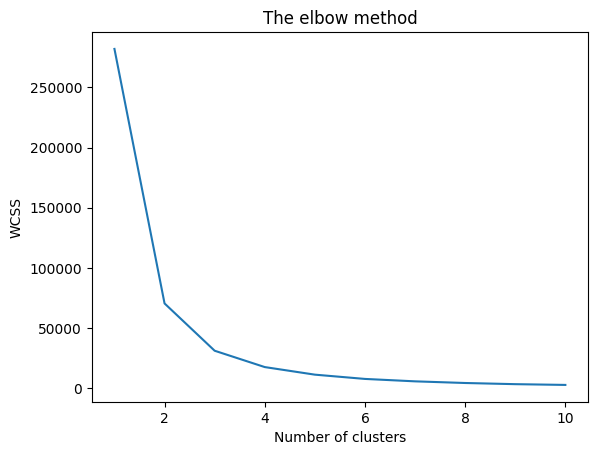

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

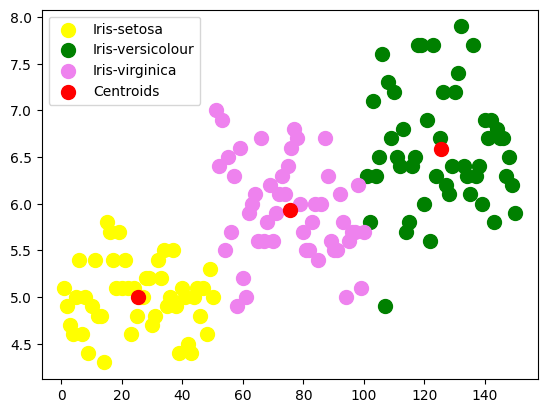

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'red', label = 'Centroids')

plt.legend()